In [1]:
import autoreload
%load_ext autoreload
%autoreload 2

import glob

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from fcsutils import FcsTrajectory
from fcsfit import *

/Users/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Get the raw files with glob
files = glob.glob('Data/FCS_raw/*.raw')

In [3]:
df_list = list()
for f in files:
    fcs = FcsTrajectory(f, 2e-5)
    fcs()
    _df = fcs.ac_as_dataframe()
    df_list.append(_df)

df = pd.concat(df_list, axis=0)
df.head()

,file,tau,autocorr
0,Data/FCS_raw/dish1-1per-pow-2_706b57114cc2539f...,0.00002,0.079991
1,Data/FCS_raw/dish1-1per-pow-2_706b57114cc2539f...,0.00004,0.059488
2,Data/FCS_raw/dish1-1per-pow-2_706b57114cc2539f...,0.00006,0.078459
3,Data/FCS_raw/dish1-1per-pow-2_706b57114cc2539f...,0.00008,0.060567
4,Data/FCS_raw/dish1-1per-pow-2_706b57114cc2539f...,0.00010,0.074380


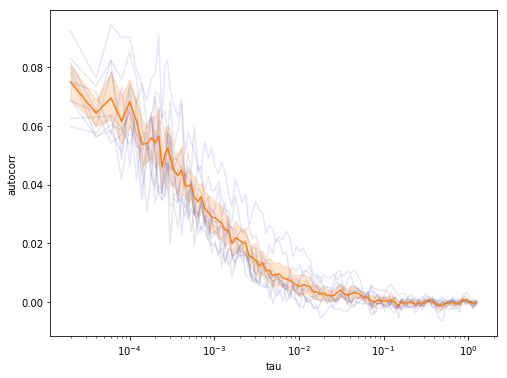

In [4]:
plt.figure(figsize=(8,6))
sns.lineplot(x='tau', y='autocorr', data=df,
             err_style="bars", hue='file', alpha=.1,
             legend=False, palette=sns.dark_palette("blue", n_colors=len(df_list)))
sns.lineplot(x='tau', y='autocorr', data=df)
plt.xscale('log')

In [5]:
fcs1 = fcs_1comp(p0 = [.1, .001, 0])
p, perr = fcs1(df.tau, df.autocorr)
p

array([0.06961186, 0.00070905, 0.00082662])

In [6]:
fcst = fcs_1comp_triplet(p0=[.1, .001, 0], bounds=None)
fcst.__xfunc__ = fcst.__func__
fcst.__func__ = lambda t, g0, td, offset:fcst.__xfunc__(
    t, g0, td, 0.05, 250e-6, offset
    )

pt, perrt = fcst(df.tau, df.autocorr)
pt


array([0.07027827, 0.00076756, 0.0007303 ])

array([0.07027827, 0.00076756, 0.0007303 ])

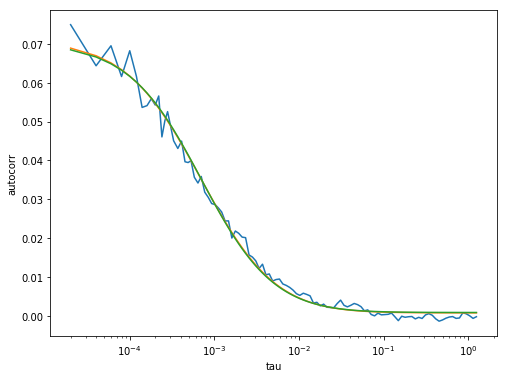

In [7]:

plt.figure(figsize=(8,6))
sns.lineplot(x='tau', y='autocorr', data=df, ci=None)
plt.plot(df.tau.unique(), fcst.predict(df.tau.unique(), pt))
plt.plot(df.tau.unique(), fcs1.predict(df.tau.unique(), p))
plt.xscale('log')
pt
